#### Plotting Lineage Prevalence

In this example, we will show how to plot the prevalence of a specific lineage from both wastewater and clinical data. Before starting make sure the Python-outbreak-data package is up-to-date and import all necessary plotting and data analysis packages. Here are the ones we used for this plot:

In [10]:
import scipy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import matplotlib.dates as mdates

matplotlib.rcParams['hatch.linewidth'] = 0.5
matplotlib.rcParams['font.family'] ='sans-serif'
locator = mdates.MonthLocator(bymonthday=1)


Authenticate your credentials in GISAID if you haven't done so yet.

In [26]:
from outbreak_data import authenticate_user
authenticate_user.authenticate_new_user()

Please open this url in a web browswer and authenticate with your GISAID credentials:  https://gpsapi.epicov.org/epi3/gps_authenticate/NAJZETKQAROFSFMUHVKTQPVITAKOHMDYPXQSWSZNIIJMHORZQJFNLOJVUETSJVRUHPWXVUJYXUPTFHOMRJTGNTJRYWKKWCYQKGVLFVTMCLFOZXCXHCEFQWMNCLEAXIOO
Waiting for authorization response... [Press Ctrl-C to abort]
Authenication failed, trying again in 5 seconds...
Waiting for authorization response... [Press Ctrl-C to abort]
Authenticated successfully!

    TERMS OF USE for Python Package and
    Reminder of GISAID's Database Access Agreement
    Your ability to access and use Data in GISAID, including your access and
    use of same via R Package, is subject to the terms and conditions of
    GISAID's Database Access Agreement (“DAA”) (which you agreed to
    when you requested access credentials to GISAID), as well as the
    following terms:
    1. You will treat all data contained in the R Package consistent with
    other Data in GISAID and in accordance with GISAID's Da

In [7]:
import os; os.chdir('/Users/sarahrandall/Python-outbreak-info')

In [8]:
from src.outbreak_data import outbreak_data
from src.outbreak_tools import outbreak_tools
from src.outbreak_tools import outbreak_clustering

In [11]:
# Saves and plots figure
def plot_out(fname):
    plt.savefig(fname, format='pdf', bbox_inches='tight')
    plt.show();

# Smooths data for plotting - required
def binom_kernel(n, squeeze=0):
    return np.array([scipy.special.binom(n+2*squeeze, x) for x in np.arange(n)+squeeze])
    
smooth = binom_kernel(7*5, 35) 

#### Pull wastewater and clinical data

First specify the location and date range for analysis and collect the daily lineage and mutation data from the wastewater samples. Then do the same for the clinical data.

In [12]:
state = "California"
state_id = 'USA_US-CA'
startdate, enddate = "2023-09-02", "2024-01-02"
ww_samples = outbreak_data.get_wastewater_samples(region=state, date_range=[startdate, enddate], server='dev.outbreak.info')
ww_lineages = outbreak_data.get_wastewater_lineages(ww_samples, server='dev.outbreak.info')

In [13]:
ww_samples

,collection_site_id,coverage_intervals,demix_success,geo_loc_country,geo_loc_region,sra_accession,variants_success,viral_load,ww_population,normed_viral_load
collection_date,,,,,,,,,,
2023-09-11,USA_CA_9c1a4413,"[{'end': 29874, 'start': 54}]",True,USA,California,SRR26424872,True,NaN,97000,NaN
2023-09-19,USA_CA_66ce45d1,"[{'end': 2284, 'start': 54}, {'end': 2933, 'st...",True,USA,California,SRR26424883,True,NaN,740000,NaN
2023-09-20,USA_CA_9c1a4413,"[{'end': 29874, 'start': 54}]",True,USA,California,SRR26424918,True,NaN,97000,NaN
2023-09-22,USA_CA_df940599,"[{'end': 5745, 'start': 54}, {'end': 15742, 's...",True,USA,California,SRR26424919,True,NaN,1480000,NaN
2023-09-18,USA_CA_1e702cb4,"[{'end': 732, 'start': 348}, {'end': 1972, 'st...",True,USA,California,SRR26424931,True,NaN,130000,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-11-21,USA_CA_16a553f8,"[{'end': 29874, 'start': 46}]",True,USA,California,SRR27023769,True,NaN,1500000,NaN
2024-01-02,USA_CA_ace0c281,"[{'end': 29874, 'start': 46}]",True,USA,California,SRR27471213,True,NaN,39000,NaN
2024-01-02,USA_CA_61d49499,"[{'end': 29874, 'start': 46}]",True,USA,California,SRR27471216,True,NaN,16000,NaN


In [10]:
ww_lineages

collection_site_id  \
collection_date lineage                         
2023-09-11      EG.5.1.4      USA_CA_9c1a4413   
                FL.1.5        USA_CA_9c1a4413   
                FL.2.3        USA_CA_9c1a4413   
                FL.26         USA_CA_9c1a4413   
                FL.27         USA_CA_9c1a4413   
...                                       ...   
2024-01-02      XBB.1.25      USA_CA_8cbe94fa   
                XBB.1.28.1    USA_CA_8cbe94fa   
                XBB.3.5       USA_CA_8cbe94fa   
                XDR.1.2       USA_CA_8cbe94fa   
                XH            USA_CA_8cbe94fa   

                                                           coverage_intervals  \
collection_date lineage                                                         
2023-09-11      EG.5.1.4                        [{'end': 29874, 'start': 54}]   
                FL.1.5                          [{'end': 29874, 'start': 54}]   
                FL.2.3                          [{'end': 29874, 'start': 54}]   
                FL.26                           [{'end': 29874, 'start': 54}]   
                FL.27                           [{'end': 29874, 'start': 54}]   
...                                                                       ...   
2024-01-02      XBB.1.25    [{'end': 448, 'start': 46}, {'end': 29874, 'st...   
                XBB.1.28.1  [{'end': 448, 'start': 46}, {'end': 29874, 'st...   
                XBB.3.5     [{'end': 448, 'start': 46}, {'end': 29874, 'st...   
                XDR.1.2     [{'end': 448, 'start': 46}, {'end': 29874, 'st...   
                XH          [{'end': 448, 'start': 46}, {'end': 29874, 'st...   

                            demix_success geo_loc_country geo_loc_region  \
collection_date lineage                                                    
2023-09-11      EG.5.1.4             True             USA     California   
                FL.1.5               True             USA     California   
                FL.2.3               True             USA     California   
                FL.26                True             USA     California   
                FL.27                True             USA     California   
...                                   ...             ...            ...   
2024-01-02      XBB.1.25             True             USA     California   
                XBB.1.28.1           True             USA     California   
                XBB.3.5              True             USA     California   
                XDR.1.2              True             USA     California   
                XH                   True             USA     California   

                           sra_accession  variants_success  viral_load  \
collection_date lineage                                                  
2023-09-11      EG.5.1.4     SRR26424872              True         NaN   
                FL.1.5       SRR26424872              True         NaN   
                FL.2.3       SRR26424872              True         NaN   
                FL.26        SRR26424872              True         NaN   
                FL.27        SRR26424872              True         NaN   
...                                  ...               ...         ...   
2024-01-02      XBB.1.25     SRR27471235              True         NaN   
                XBB.1.28.1   SRR27471235              True         NaN   
                XBB.3.5      SRR27471235              True         NaN   
                XDR.1.2      SRR27471235              True         NaN   
                XH           SRR27471235              True         NaN   

                            ww_population  normed_viral_load        query  \
collection_date lineage                                                     
2023-09-11      EG.5.1.4            97000                NaN  SRR26424872   
                FL.1.5              97000                NaN  SRR26424872   
                FL.2.3              97000                NaN  SRR26424872  

In [14]:
ww_prevalences = outbreak_tools.datebin_and_agg(ww_lineages, weights=outbreak_tools.get_ww_weights(ww_lineages), startdate=startdate, enddate=enddate, freq='7D', rolling=[1,4,1], log=False)
ww_prevalences_daily_unsmoothed = outbreak_tools.datebin_and_agg(ww_lineages, weights=outbreak_tools.get_ww_weights(ww_lineages), startdate=startdate, enddate=enddate, freq='D', rolling=1, log=False)
ww_prevalences_daily, ww_prevalences_daily_varis = outbreak_tools.datebin_and_agg(ww_lineages, weights=outbreak_tools.get_ww_weights(ww_lineages), startdate=startdate, enddate=enddate, freq='D', rolling=smooth, log=False, variance=True)

In [15]:
clinical_samples = outbreak_data.all_lineage_prevalences(location=state_id, other_threshold=0.0, nday_threshold=1)
clinical_prevalences = outbreak_tools.datebin_and_agg(clinical_samples, weights=clinical_samples['total_count'], startdate=startdate, enddate=enddate, freq='7D', rolling=[1,4,1])
clinical_prevalences_daily_unsmoothed = outbreak_tools.datebin_and_agg(clinical_samples, weights=clinical_samples['total_count'], startdate=startdate, enddate=enddate, rolling=1, freq='D', log=False)
clinical_prevalences_daily, clinical_prevalences_daily_varis = outbreak_tools.datebin_and_agg(clinical_samples, weights=clinical_samples['total_count'], startdate=startdate, enddate=enddate, rolling=smooth, freq='D', log=False, variance=True)

#### Get the lineage tree data

To group the wastewater data properly for graphing, we need to get lineage data from the pre-parsed lineage tree (derived from the Pangolin project). This will help us organize and cluster lineages later.

In [16]:
tree = outbreak_clustering.get_compressed_tree()
lineage_key = outbreak_clustering.get_lineage_key(tree)

In [17]:
samples_per_site = ww_samples['sra_accession'].groupby(ww_samples['collection_site_id']).nunique()

date_range_per_site = ww_samples.index.to_series().apply(pd.to_datetime).groupby(ww_samples['collection_site_id']) #.apply(pd.to_datetime)
date_range_per_site = date_range_per_site.apply(lambda x: x.max() - x.min())

sites_for_vl = (date_range_per_site.apply(lambda x: x.days >= 14)) & (samples_per_site >= 3)
samples_for_vl = ww_samples[ww_samples['collection_site_id'].isin(list(sites_for_vl.index[sites_for_vl]))]

#### Cluster lineages 

Now we generate clustered groups given our prevalence and lineage tree data. We can use one set of clusters for both wastewater and clinical data.

In [18]:
ww_prev_data = ww_prevalences.sum()
clusters = outbreak_clustering.cluster_lineages(ww_prev_data, tree, lineage_key=lineage_key, n=10, alpha=0.25)

#### Preparing clustered daily prevalence data for plotting

Next we want to apply the clusters to our clinical and wastewater data. From this we will get daily prevalences and variance data to use for our visual. 

In [19]:
clustered_ww_prevalences_daily_unsmoothed, _, _ = outbreak_tools.cluster_df(ww_prevalences_daily_unsmoothed.fillna(0), clusters, tree, lineage_key)
clustered_ww_prevalences_daily, _, _ = outbreak_tools.cluster_df(ww_prevalences_daily.fillna(0), clusters, tree, lineage_key)
clustered_ww_prevalences_daily_varis, _, _ = outbreak_tools.cluster_df(ww_prevalences_daily_varis.fillna(0), clusters, tree, lineage_key, norm=False)

clustered_cl_prevalences_daily_unsmoothed, _, _ = outbreak_tools.cluster_df(clinical_prevalences_daily_unsmoothed.fillna(0), clusters, tree, lineage_key)
clustered_cl_prevalences_daily, _, _ = outbreak_tools.cluster_df(clinical_prevalences_daily.fillna(0), clusters, tree, lineage_key)
clustered_cl_prevalences_daily_varis, _, _ = outbreak_tools.cluster_df(clinical_prevalences_daily_varis.fillna(0), clusters, tree, lineage_key, norm=False)

#### Lineage Prevalence Graph

Use this function to ensure the data is normalized for the graph.

In [20]:
# Normalizing data 
def lognorm_ci(x, r):
    return (np.exp(np.log(x)-(r**0.5/x)), np.exp(np.log(x)+(r**0.5/x)))

With our clustered wastewater and prevalence data, we can now apply this to any lineage of our choice. We'll pick one from the clinical data set and graph the prevalence data.

In [22]:
lin = clustered_ww_prevalences_daily.columns[-1] # Refers to lineage XBB.1.9.2.5.1.6.1 
lin

'      XBB.1.9.2.5.1.6.1* (HV.1)'

In [26]:
clustered_ww_prevalences_daily_unsmoothed

,other **,other XBB*,other XBB.1*,other XBB.1.9*,other XBB.1.9.2*,other XBB.1.9.2.5* (EG.5),other XBB.1.9.2.5.1* (EG.5.1),XBB.1.9.2.5.1.1* (EG.5.1.1),other XBB.1.9.2.5.1.6* (EG.5.1.6),XBB.1.9.2.5.1.6.1* (HV.1)
"(2023-09-01 00:00:00, 2023-09-02 00:00:00]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2023-09-02 00:00:00, 2023-09-03 00:00:00]",0.025776,0.145677,0.189116,0.100085,0.288213,0.000000,0.248958,0.002173,0.000000,0.000000
"(2023-09-03 00:00:00, 2023-09-04 00:00:00]",0.288709,0.058772,0.462879,0.008197,0.052839,0.000000,0.060105,0.000000,0.000000,0.068499
"(2023-09-04 00:00:00, 2023-09-05 00:00:00]",0.060361,0.086481,0.460612,0.052087,0.065025,0.011845,0.199058,0.037840,0.008695,0.017995
"(2023-09-05 00:00:00, 2023-09-06 00:00:00]",0.004292,0.150767,0.553008,0.098430,0.057271,0.059720,0.043522,0.026055,0.000000,0.006936
...,...,...,...,...,...,...,...,...,...,...
"(2023-12-29 00:00:00, 2023-12-30 00:00:00]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2023-12-30 00:00:00, 2023-12-31 00:00:00]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2023-12-31 00:00:00, 2024-01-01 00:00:00]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2024-01-01 00:00:00, 2024-01-02 00:00:00]",0.273296,0.000000,0.008217,0.005620,0.000000,0.000000,0.377357,0.335510,0.000000,0.000000


In [24]:
clustered_ww_prevalences_daily

,other **,other XBB*,other XBB.1*,other XBB.1.9*,other XBB.1.9.2*,other XBB.1.9.2.5* (EG.5),other XBB.1.9.2.5.1* (EG.5.1),XBB.1.9.2.5.1.1* (EG.5.1.1),other XBB.1.9.2.5.1.6* (EG.5.1.6),XBB.1.9.2.5.1.6.1* (HV.1)
"(2023-09-01 00:00:00, 2023-09-02 00:00:00]",0.036788,0.105707,0.450532,0.069326,0.063321,0.031150,0.140221,0.067693,0.013815,0.021446
"(2023-09-02 00:00:00, 2023-09-03 00:00:00]",0.036838,0.104829,0.449318,0.069657,0.063039,0.031741,0.138620,0.069438,0.014393,0.022126
"(2023-09-03 00:00:00, 2023-09-04 00:00:00]",0.037014,0.103743,0.447855,0.069952,0.063006,0.032305,0.137056,0.071122,0.015098,0.022849
"(2023-09-04 00:00:00, 2023-09-05 00:00:00]",0.037358,0.102429,0.445980,0.070251,0.063298,0.032826,0.135480,0.072751,0.015985,0.023642
"(2023-09-05 00:00:00, 2023-09-06 00:00:00]",0.037869,0.100841,0.443814,0.070507,0.063901,0.033265,0.133854,0.074326,0.017107,0.024518
...,...,...,...,...,...,...,...,...,...,...
"(2023-12-29 00:00:00, 2023-12-30 00:00:00]",0.589802,0.004298,0.107214,0.007482,0.011806,0.002638,0.120943,0.037129,0.048616,0.070073
"(2023-12-30 00:00:00, 2023-12-31 00:00:00]",0.597506,0.003914,0.106695,0.006607,0.011823,0.002349,0.117351,0.036859,0.049803,0.067093
"(2023-12-31 00:00:00, 2024-01-01 00:00:00]",0.604749,0.003608,0.106334,0.005871,0.011668,0.002062,0.114228,0.036756,0.051055,0.063669
"(2024-01-01 00:00:00, 2024-01-02 00:00:00]",0.611549,0.003355,0.106369,0.005341,0.011311,0.001777,0.111450,0.036736,0.052328,0.059785


This is what the raw unsmoothed data looks like as a scatter plot:

/Users/sarahrandall/myvenv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


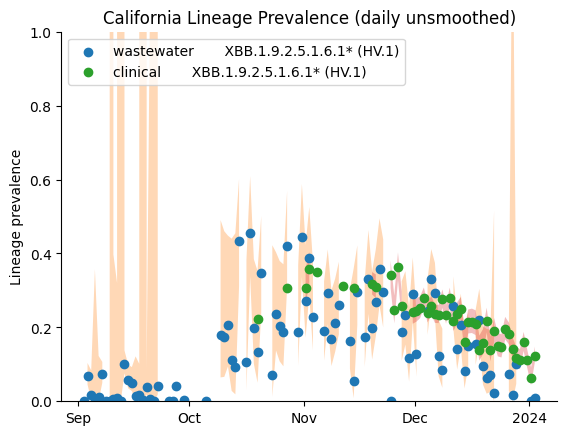

In [23]:
_,ax = plt.subplots()
l,u = lognorm_ci(clustered_ww_prevalences_daily_unsmoothed[lin], clustered_ww_prevalences_daily_varis[lin])
ax.scatter(clustered_ww_prevalences_daily_unsmoothed.index.mid, clustered_ww_prevalences_daily_unsmoothed[lin], label=f'wastewater {lin}')
ax.fill_between(clustered_ww_prevalences_daily_unsmoothed.index.mid, l, u, alpha=0.3, zorder=-1)

l,u = lognorm_ci(clustered_cl_prevalences_daily_unsmoothed[lin], clustered_cl_prevalences_daily_varis[lin])
ax.scatter(clustered_cl_prevalences_daily_unsmoothed.index.mid, clustered_cl_prevalences_daily_unsmoothed[lin], label=f'clinical {lin}')
ax.fill_between(clustered_cl_prevalences_daily_unsmoothed.index.mid, l, u, alpha=0.3, zorder=-1)

ax.set_ylim(0, 1)
ax.set_ylabel('Lineage prevalence')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
ax.legend(loc='upper left')
ax.spines[['right', 'top']].set_visible(False)
plt.title(f'{state} Lineage Prevalence (daily unsmoothed)')
plot_out('lin_prev_plot_rolling.pdf')

In [25]:
x = clustered_ww_prevalences_daily_unsmoothed.index.mid
x

DatetimeIndex(['2023-09-01 12:00:00', '2023-09-02 12:00:00',
               '2023-09-03 12:00:00', '2023-09-04 12:00:00',
               '2023-09-05 12:00:00', '2023-09-06 12:00:00',
               '2023-09-07 12:00:00', '2023-09-08 12:00:00',
               '2023-09-09 12:00:00', '2023-09-10 12:00:00',
               ...
               '2023-12-24 12:00:00', '2023-12-25 12:00:00',
               '2023-12-26 12:00:00', '2023-12-27 12:00:00',
               '2023-12-28 12:00:00', '2023-12-29 12:00:00',
               '2023-12-30 12:00:00', '2023-12-31 12:00:00',
               '2024-01-01 12:00:00', '2024-01-02 12:00:00'],
              dtype='datetime64[ns]', length=124, freq=None)

Here is the smoothed plot of the daily rolling prevalence data:

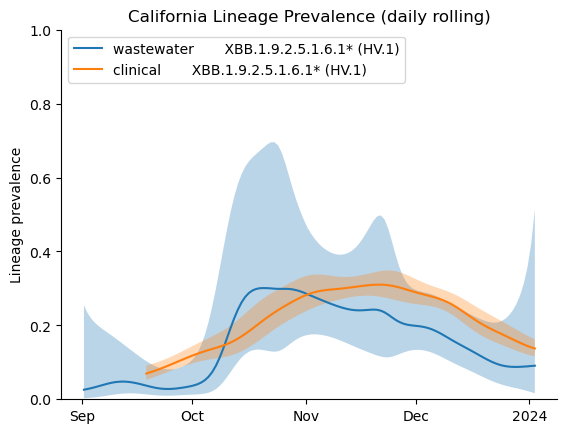

In [21]:
_,ax = plt.subplots()
l,u = lognorm_ci(clustered_ww_prevalences_daily[lin], clustered_ww_prevalences_daily_varis[lin])
ax.plot(clustered_ww_prevalences_daily.index.mid, clustered_ww_prevalences_daily[lin], label=f'wastewater {lin}')
ax.fill_between(clustered_ww_prevalences_daily.index.mid, l, u, alpha=0.3, zorder=-1)

l,u = lognorm_ci(clustered_cl_prevalences_daily[lin], clustered_cl_prevalences_daily_varis[lin])
ax.plot(clustered_cl_prevalences_daily.index.mid, clustered_cl_prevalences_daily[lin], label=f'clinical {lin}')
ax.fill_between(clustered_cl_prevalences_daily.index.mid, l, u, alpha=0.3, zorder=-1)

ax.set_ylim(0, 1)
ax.set_ylabel('Lineage prevalence')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
ax.legend(loc='upper left')
ax.spines[['right', 'top']].set_visible(False)
plt.title(f'{state} Lineage Prevalence (daily rolling)')
plot_out('lin_prev_plot_rolling.pdf')